In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
import pandas as pd

# Define the tasks
tasks = ['p1', 'p2', 'p3', 'p4']
import os
# Loop over each task
for task in tasks:
    results_path = f'./{task}/'
    algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'ActorCritic', 'WSLS','HMM','Momentum','Bayesian','OnlineSVM','OldOfflineSVM','QLearnAligned-Individual-Model'])
    print('Processing for task', task)

    # Initialize an empty DataFrame to store results for the task
    df_all = pd.DataFrame()

    for algo in algorithms:
        try:
            # Read the CSV file for the algorithm
            print(f'Processing for {algo}')
            df = pd.read_csv(results_path + algo + '.csv')

            if task in ['p1','p2']:
                df['Openended'] = 'Focused'
            else:
                df['Openended'] = 'Openended'
            # Add a 'task' column to the DataFrame
            df['Task'] = task

            # Add an 'Algorithm' column to the DataFrame
            df['Algorithm'] = algo
        except FileNotFoundError:
            print('No file for', algo)
            continue
        #remove rows with threshold 0.05
        df = df[df['Threshold'] == 0.8]
        # Concatenate the current DataFrame with the DataFrame for all algorithms
        df_all = pd.concat([df_all, df])

        print('Unique users for', algo, 'in', task, 'are', df['User'].nunique())
        print('unique thresholds for', algo, 'in', task, 'are', df['Threshold'].nunique())

        dataset= 'Movies'
        filename = f'all_experiments_{dataset}_{task}.csv'
        df_all.to_csv(filename, index=False)
    print('Length of data for task', task, 'is', len(df_all))











Processing for task p1
Processing for ActorCritic
Unique users for ActorCritic in p1 are 36
unique thresholds for ActorCritic in p1 are 1
Processing for Bayesian
Unique users for Bayesian in p1 are 36
unique thresholds for Bayesian in p1 are 1
Processing for Greedy
Unique users for Greedy in p1 are 36
unique thresholds for Greedy in p1 are 1
Processing for HMM
Unique users for HMM in p1 are 36
unique thresholds for HMM in p1 are 1
Processing for Momentum
Unique users for Momentum in p1 are 36
unique thresholds for Momentum in p1 are 1
Processing for OldOfflineSVM
No file for OldOfflineSVM
Processing for OnlineSVM
Unique users for OnlineSVM in p1 are 36
unique thresholds for OnlineSVM in p1 are 1
Processing for QLearn
Unique users for QLearn in p1 are 36
unique thresholds for QLearn in p1 are 1
Processing for QLearnAligned-Individual-Model
No file for QLearnAligned-Individual-Model
Processing for Random
Unique users for Random in p1 are 36
unique thresholds for Random in p1 are 1
Proces

In [4]:
#combine all task data into a single file
tasks = ['p1', 'p2', 'p3', 'p4']
df_all_master= pd.DataFrame()
# Loop over each task
for task in tasks:
    dataset= 'Movies'
    filename = f'all_experiments_{dataset}_{task}.csv'
    df = pd.read_csv(filename)
    print(f'Processing for {task} length of data is {len(df)}')
    df_all_master = pd.concat([df_all_master, df])

print(f'Per algorithm data is {df_all_master.groupby("Algorithm").size()}')

Processing for p1 length of data is 396
Processing for p2 length of data is 396
Processing for p3 length of data is 396
Processing for p4 length of data is 396
Per algorithm data is Algorithm
ActorCritic    144
Bayesian       144
Greedy         144
HMM            144
Momentum       144
OnlineSVM      144
QLearn         144
Random         144
Reinforce      144
SARSA          144
WSLS           144
dtype: int64


In [5]:
# Load the uploaded CSV file
#save the combined data to a file
df_all_master.to_csv('all_experiments_Movies.csv', index=False)
#read the file
file_path = 'all_experiments_Movies.csv'
data_movies = pd.read_csv(file_path)
data_movies['Algorithm'].replace({'ActorCritic': 'Actor-Critic','OldOfflineSVM':'OfflineSVM', 'QLearnAligned-Individual-Model':'QLearning-Aligned'}, inplace=True)
#size of data per algorithm
data_movies.groupby('Algorithm').size()

Algorithm
Actor-Critic    144
Bayesian        144
Greedy          144
HMM             144
Momentum        144
OnlineSVM       144
QLearn          144
Random          144
Reinforce       144
SARSA           144
WSLS            144
dtype: int64

In [6]:
import matplotlib.pyplot as plt

def create_plot(data_threshold, svg_file_path,title):
    # Create a boxplot of the accuracy per algorithm
    algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'Actor-Critic', 'WSLS','HMM','Momentum','Bayesian','OnlineSVM','OfflineSVM','QLearning-Aligned'])
    #create a fixed order and reuasble color map for the algorithms
    color_map = {algo: sns.color_palette('tab20')[i] for i, algo in enumerate(algorithms)}

    data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy'] * 100
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x='Algorithm', y='ThresholdAccuracy', data=data_threshold, palette=color_map)
    #add mean accuracy per algorithm as txt to the boxplot
    means = data_threshold.groupby('Algorithm')['ThresholdAccuracy'].mean()
    x_ticks = ax.get_xticks()  # Get the x positions of the boxes on the plot
    for i, algorithm in enumerate(ax.get_xticklabels()):
        algorithm_name = algorithm.get_text()  # Get the algorithm name from the x-axis label
        mean_val = means[algorithm_name]
        ax.text(x_ticks[i], mean_val, f'{mean_val:.2f}',
                horizontalalignment='center', color='black', weight='semibold')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Accuracy(%')
    plt.title(title)
    print(f'Color map is {color_map}')





Size per algorithm is Algorithm
Actor-Critic    144
Bayesian        144
Greedy          144
HMM             144
Momentum        144
OnlineSVM       144
QLearn          144
Random          144
Reinforce       144
SARSA           144
WSLS            144
dtype: int64
Color map is {'Actor-Critic': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Bayesian': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), 'Greedy': (1.0, 0.4980392156862745, 0.054901960784313725), 'HMM': (1.0, 0.7333333333333333, 0.47058823529411764), 'Momentum': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'OfflineSVM': (0.596078431372549, 0.8745098039215686, 0.5411764705882353), 'OnlineSVM': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'QLearn': (1.0, 0.596078431372549, 0.5882352941176471), 'QLearning-Aligned': (0.5803921568627451, 0.403921568627451, 0.7411764705882353), 'Random': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), 'Reinforce': (0.5

Algorithm
Actor-Critic    144
Bayesian        144
Greedy          144
HMM             144
Momentum        144
OnlineSVM       144
QLearn          144
Random          144
Reinforce       144
SARSA           144
WSLS            144
dtype: int64

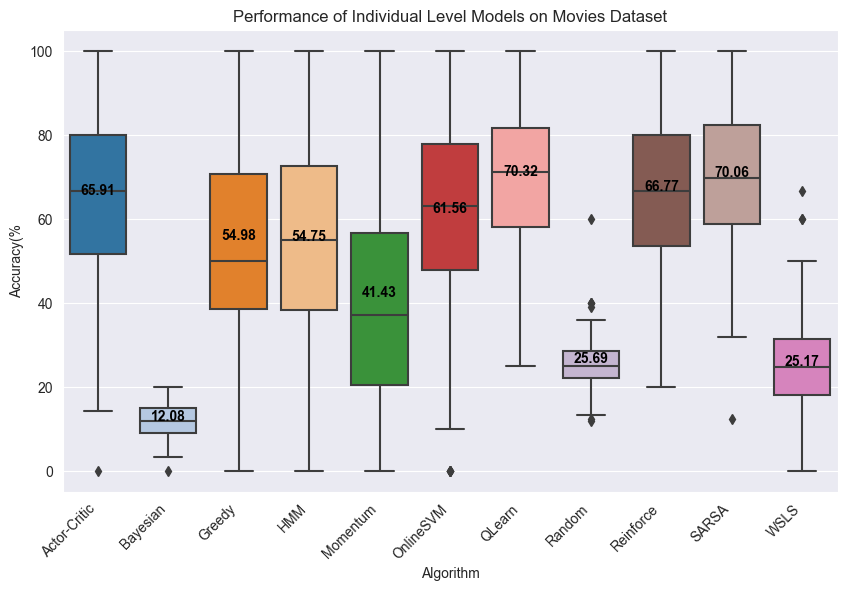

In [7]:
#specific threshold
data_threshold= data_movies[data_movies['Threshold']==0.8]
data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy']
print(f'Size per algorithm is {data_threshold.groupby("Algorithm").size()}')
create_plot(data_threshold, 'Movies-All-Individual-IUI.png', 'Performance of Individual Level Models on Movies Dataset')
#list rows per algorithm
data_threshold.groupby('Algorithm').size()



Birdstrikes Dataset

In [8]:
import pandas as pd

# Define the tasks
tasks = ['p1', 'p2', 'p3', 'p4']

#delete the previous data
try:
    del df_all
    del df_all_master
    del data_movies
    del data_threshold
except NameError:
    pass



# Loop over each task
for task in tasks:
    results_path = f'../birdstrikes/{task}/'
    algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'ActorCritic', 'WSLS','HMM','Momentum','Bayesian','OnlineSVM','OldOfflineSVM','QLearnAligned-Individual-Model'])
    print('Processing for task', task)
    df_all = pd.DataFrame()
    # Loop over each algorithm
    for algo in algorithms:
        try:
            # Read the CSV file for the algorithm
            df = pd.read_csv(results_path + algo + '.csv')
            print(f'Processing for {algo} in {task} length of data is {len(df)}')
            if algo == 'Ottley-HMM':
                df.drop(columns=['rank'], inplace=True)
                df.drop_duplicates(inplace=True)
                df['Threshold']=df['threshold']
                df['Accuracy']=df['ncp-1']
            #openended or not column
            if task in ['p1','p2']:
                df['Openended'] = 'Focused'
            else:
                df['Openended'] = 'Openended'
            # Add a 'task' column to the DataFrame
            df['Task'] = task

            # Add an 'Algorithm' column to the DataFrame
            df['Algorithm'] = algo
        except FileNotFoundError:
            print('No file for', algo)
            continue
        #remove rows with threshold 0.05
        df = df[df['Threshold'] == 0.8]
        # Concatenate the current DataFrame with the DataFrame for all algorithms
        df_all = pd.concat([df_all, df])

        print('Unique users for', algo, 'in', task, 'are', df['User'].nunique())
        print('unique thresholds for', algo, 'in', task, 'are', df['Threshold'].nunique())

        dataset= 'Birdstrikes'
        filename = f'all_experiments_{dataset}_{task}.csv'
        path= f'../birdstrikes/{filename}'
        df_all.to_csv(path, index=False)
    print('Length of data for task', task, 'is', len(df_all))




Processing for task p1
Processing for ActorCritic in p1 length of data is 360
Unique users for ActorCritic in p1 are 36
unique thresholds for ActorCritic in p1 are 1
Processing for Bayesian in p1 length of data is 360
Unique users for Bayesian in p1 are 36
unique thresholds for Bayesian in p1 are 1
Processing for Greedy in p1 length of data is 360
Unique users for Greedy in p1 are 36
unique thresholds for Greedy in p1 are 1
Processing for HMM in p1 length of data is 324
Unique users for HMM in p1 are 36
unique thresholds for HMM in p1 are 1
Processing for Momentum in p1 length of data is 360
Unique users for Momentum in p1 are 36
unique thresholds for Momentum in p1 are 1
No file for OldOfflineSVM
Processing for OnlineSVM in p1 length of data is 324
Unique users for OnlineSVM in p1 are 36
unique thresholds for OnlineSVM in p1 are 1
Processing for QLearn in p1 length of data is 360
Unique users for QLearn in p1 are 36
unique thresholds for QLearn in p1 are 1
Processing for QLearnAligned

In [9]:
#combine all task data into a single file
tasks = ['p1', 'p2', 'p3', 'p4']
df_all_master= pd.DataFrame()
# Loop over each task
for task in tasks:
    dataset= 'Birdstrikes'
    filename = f'all_experiments_{dataset}_{task}.csv'
    path= f'../birdstrikes/{filename}'
    df = pd.read_csv(path)
    print(f'Processing for {task} length of data is {len(df)}')
    df_all_master = pd.concat([df_all_master, df])

print(f'Per algorithm data is {df_all_master.groupby("Algorithm").size()}')

Processing for p1 length of data is 432
Processing for p2 length of data is 432
Processing for p3 length of data is 396
Processing for p4 length of data is 396
Per algorithm data is Algorithm
ActorCritic                       144
Bayesian                          144
Greedy                            144
HMM                               144
Momentum                          144
OnlineSVM                         144
QLearn                            144
QLearnAligned-Individual-Model     72
Random                            144
Reinforce                         144
SARSA                             144
WSLS                              144
dtype: int64


In [10]:
# Load the uploaded CSV file
#save the combined data to a file
path= f'../birdstrikes/all_experiments_Birdstrikes.csv'
df_all_master.to_csv(path, index=False)
#read the file
file_path = path
data_birdstrikes = pd.read_csv(file_path)
data_birdstrikes['Algorithm'].replace({'ActorCritic': 'Actor-Critic','OldOfflineSVM':'OfflineSVM', 'QLearnAligned-Individual-Model':'QLearning-Aligned'}, inplace=True)
#size of data per algorithm
data_birdstrikes.groupby('Algorithm').size()

Algorithm
Actor-Critic         144
Bayesian             144
Greedy               144
HMM                  144
Momentum             144
OnlineSVM            144
QLearn               144
QLearning-Aligned     72
Random               144
Reinforce            144
SARSA                144
WSLS                 144
dtype: int64

Size per algorithm is Algorithm
Actor-Critic         144
Bayesian             144
Greedy               144
HMM                  144
Momentum             144
OnlineSVM            144
QLearn               144
QLearning-Aligned     72
Random               144
Reinforce            144
SARSA                144
WSLS                 144
dtype: int64
Color map is {'Actor-Critic': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Bayesian': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), 'Greedy': (1.0, 0.4980392156862745, 0.054901960784313725), 'HMM': (1.0, 0.7333333333333333, 0.47058823529411764), 'Momentum': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'OfflineSVM': (0.596078431372549, 0.8745098039215686, 0.5411764705882353), 'OnlineSVM': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'QLearn': (1.0, 0.596078431372549, 0.5882352941176471), 'QLearning-Aligned': (0.5803921568627451, 0.403921568627451, 0.7411764705882353), 'Random':

Algorithm
Actor-Critic         144
Bayesian             144
Greedy               144
HMM                  144
Momentum             144
OnlineSVM            144
QLearn               144
QLearning-Aligned     72
Random               144
Reinforce            144
SARSA                144
WSLS                 144
dtype: int64

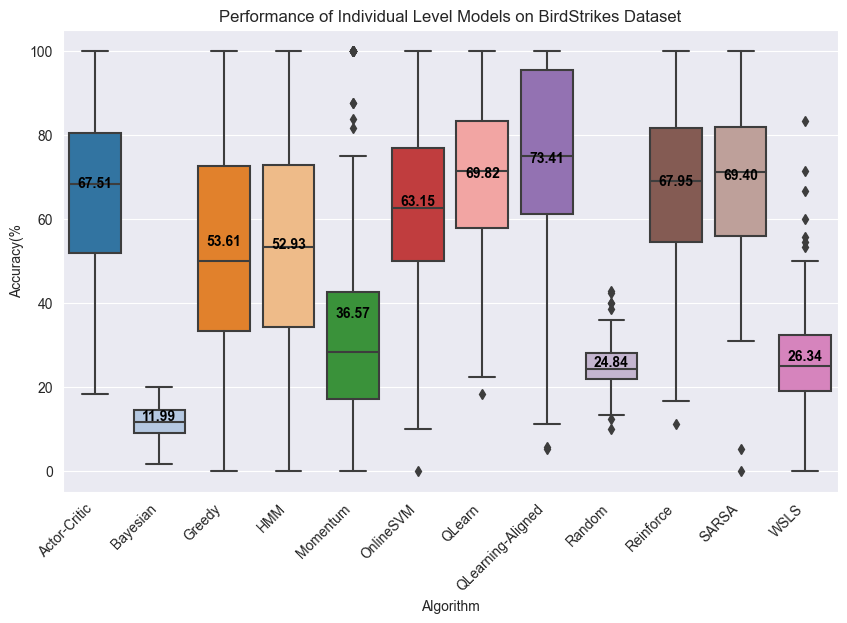

In [11]:
data_threshold= data_birdstrikes[data_birdstrikes['Threshold']==0.8]
data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy']
print(f'Size per algorithm is {data_threshold.groupby("Algorithm").size()}')
create_plot(data_threshold, 'BirdStrikes-All-Individual-IUI.png', 'Performance of Individual Level Models on BirdStrikes Dataset')
#list rows per algorithm
data_threshold.groupby('Algorithm').size()

Size per algorithm is Algorithm
Actor-Critic         288
Bayesian             288
Greedy               288
HMM                  288
Momentum             288
OnlineSVM            288
QLearn               288
QLearning-Aligned     72
Random               288
Reinforce            288
SARSA                288
WSLS                 288
dtype: int64
Color map is {'Actor-Critic': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'Bayesian': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), 'Greedy': (1.0, 0.4980392156862745, 0.054901960784313725), 'HMM': (1.0, 0.7333333333333333, 0.47058823529411764), 'Momentum': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 'OfflineSVM': (0.596078431372549, 0.8745098039215686, 0.5411764705882353), 'OnlineSVM': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 'QLearn': (1.0, 0.596078431372549, 0.5882352941176471), 'QLearning-Aligned': (0.5803921568627451, 0.403921568627451, 0.7411764705882353), 'Random':

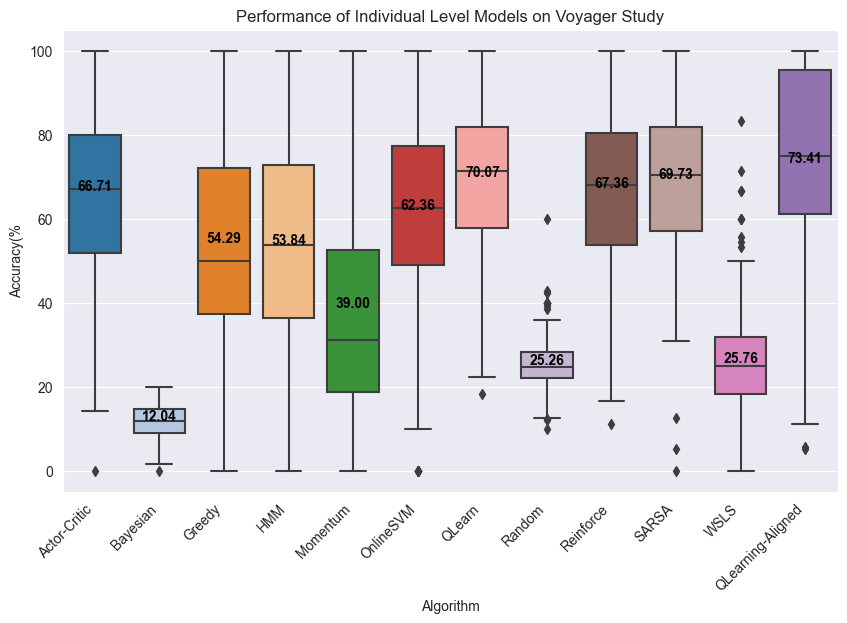

In [12]:
#combine both dataset and create a plot
data_movies= pd.read_csv('all_experiments_Movies.csv')
birdstrikes_path= f'../birdstrikes/all_experiments_Birdstrikes.csv'
data_birdstrikes= pd.read_csv(birdstrikes_path)
data_combined= pd.concat([data_movies, data_birdstrikes])
data_combined['Algorithm'].replace({'ActorCritic': 'Actor-Critic','OldOfflineSVM':'OfflineSVM', 'QLearnAligned-Individual-Model':'QLearning-Aligned'}, inplace=True)
data_combined.groupby('Algorithm').size()

data_threshold= data_combined[data_combined['Threshold']==0.8]
data_threshold['ThresholdAccuracy'] = data_threshold['Accuracy']
print(f'Size per algorithm is {data_threshold.groupby("Algorithm").size()}')
create_plot(data_threshold, 'Combined-All-Individual-IUI.png', 'Performance of Individual Level Models on Voyager Study')
